 <h1>                                                NETFLIX RECOMMENDATION SYSTEM</h1>

<h1> Problem Description </h1>

<p>
Netflix is all about connecting people to the movies they love. To help customers find those movies, they developed world-class movie recommendation system: Its job is to predict whether someone will enjoy a movie based on how much they liked or disliked other movies. Netflix use those predictions to make personal movie recommendations based on each customer’s unique tastes.
</p>

<h2> Problem Statement:Analysis of Netflix Titles </h2>

<h2>Dataset </h2>

<ul>
<li> https://www.kaggle.com/datasets/shivamb/netflix-shows</li>

</ul>

<h2>Team Name:Computer Visionaries</h2>

<h2>Team Members</h2>
<h3>Ayush Satish Govind       PES1UG20CS096</h3>
<h3> Darshan Bafna       PES1UG20CS727</h3>
<h3>Chetan Reddy Bandi     PES1UG20CS109</h3>

<h2>Exploratory Data Analysis(EDA)</h2>

<h3>PREPROCESSING</h3>

In [86]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import pandas as pd
from pandas import DataFrame
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

sns.set_theme(style="darkgrid")


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [87]:
# Reading the csv file
df=pd.read_csv('C:\\Users\\CHETAN\\OneDrive\\Desktop\\PES1UG20CS109\\DA\\PROJECT\\netflix_titles.csv')

In [88]:
df.head() # Displays the entire dataset. 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [89]:
df.columns # Gives all the column.

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

<h3>Checking NaN values:</h3>

In [90]:
# just to make sure that all Nan containing rows are deleted..
print("No of Nan values in our dataframe : ", sum(df.isnull().any()))

No of Nan values in our dataframe :  6


In [91]:
# Calculate missing value and their percentage for each column
def missing_pct(df):
    missing_count_percent = df.isnull().sum() * 100 / df.shape[0]
    df_missing_count_percent = pd.DataFrame(missing_count_percent).round(2)
    df_missing_count_percent = df_missing_count_percent.reset_index().rename(
                    columns={
                            'index':'Column',
                            0:'Missing_Percentage (%)'
                    }
                )
    df_missing_value = df.isnull().sum()
    df_missing_value = df_missing_value.reset_index().rename(
                    columns={
                            'index':'Column',
                            0:'Missing_value_count'
                    }
                )
    # Sort the data frame
    #df_missing = df_missing.sort_values('Missing_Percentage (%)', ascending=False)
    Final = df_missing_value.merge(df_missing_count_percent, how = 'inner', left_on = 'Column', right_on = 'Column')
    Final = Final.sort_values(by = 'Missing_Percentage (%)',ascending = False)
    return Final

missing_pct(df)

,Column,Missing_value_count,Missing_Percentage (%)
3,director,2634,29.91
5,country,831,9.44
4,cast,825,9.37
6,date_added,10,0.11
8,rating,4,0.05
9,duration,3,0.03
0,show_id,0,0.00
1,type,0,0.00
2,title,0,0.00
7,release_year,0,0.00


In [92]:
# Filling the null values with mode for the numeric column and then the columns with string is filled with NULL
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['country'].mode()[0])
df['duration'] = df['duration'].fillna('0 min')
df['cast'] = df['cast'].fillna('NULL')
df['director'] = df['director'].fillna('NULL')


In [93]:
# Checking is any Missing data in each column of the dataset.
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

<h3>Checking Duplicate values:</h3>

In [94]:
# Checking for any dupicate values.
dup_bool = df.duplicated(['title','country','type','release_year','show_id'])
df[dup_bool]
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 0 duplicate rating entries in the data..


<h3>Distribution of Contents:</h3>

In [95]:
z = df.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(z, values='counts', names='rating',
title='Distribution of Content Ratings on Netflix',color_discrete_sequence=px.colors.sequential.RdBu)
pieChart.show()

<h2> DATA MANIPULATION</h2>

<ul>Adding some new columns:

Year Added - y_add,
Month Added - m_add,
Princial Country - country_main,
Target Age Groups - target_age</ul>

In [96]:
# Adding a new column y_add using lamba function.
df['y_add'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['y_add'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: y_add, dtype: object

In [97]:
# Adding a new column m_add using lamba function.
df['m_add'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['m_add'].head()

0    September
1    September
2    September
3    September
4    September
Name: m_add, dtype: object

In [98]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_age'] = df['rating'].replace(ratings_ages)

In [99]:
# Adding a new column country_main which tells the main country the content is being watched using lamba function.
df['country_main'] = df['country'].apply(lambda x: x.split(",")[0])
df['country_main'].head()

0    United States
1     South Africa
2    United States
3    United States
4            India
Name: country_main, dtype: object

<ul>Making two new dataframes, one with movies collection and other with TV shows collection:
<li>
movie_df,
tv_df</li></ul>

In [100]:
movie_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

In [101]:
movie_df.head() #Describes the movies dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,y_add,m_add,target_age,country_main
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NULL,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Teens,United States
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September,Older Kids,United States
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,September,Adults,United States
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,September,Teens,United States
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,September,Adults,Germany


<h2>Data Visualization</h2>

<h3>Percentage of Movies and TV show</h3>

In [102]:
x = df['type'].value_counts().reset_index()
plot = px.pie(x,values='type',names='index',color_discrete_sequence=px.colors.sequential.RdBu)
plot.update_traces(textposition='inside', textinfo='percent+label',marker = dict(line = dict(color = 'white', width = 1)))

<h3>Categorization based upon other factors:</h3>

In [103]:
country_df = df['country_main'].value_counts().reset_index()
country_df = country_df[country_df['country_main'] /  country_df['country_main'].sum() > 0.01]

ptx = px.pie(country_df, values='country_main', names='index',color_discrete_sequence=px.colors.sequential.RdBu)
ptx.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 1)))
ptx.show()

<h3> Year wise analysis of Movie and TV show</h3>

In [104]:
def generate_df(df):
    new_df = df.groupby(['y_add', 'm_add']).agg({'show_id': 'count'}).reset_index()
    new_df = new_df[new_df['show_id'] != 0]
    new_df.columns = ['y_add', 'm_add', 'counts']
    new_df = new_df.sort_values('y_add')
    return new_df

In [105]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

movie_new_df = generate_df(movie_df)
tv_new_df = generate_df(tv_df)

plot = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])
plot.add_trace(
    go.Pie(labels=movie_new_df['y_add'], values=movie_new_df['counts']),
    row=1, col=1
)

plot.add_trace(
    go.Pie(labels=tv_new_df['y_add'], values=tv_new_df['counts']),
    row=1, col=2
)

plot.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name",
                  marker = dict(line = dict(color = 'white', width = 2)))

plot.update_layout(
    title_text="Content distribution by Year of Adding",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Movies', x=0.18, y=0.5, font_size=17, showarrow=False, font_color='black'),
                 dict(text='TV Shows', x=0.83, y=0.5, font_size=17, showarrow=False, font_color='black')])
plot.show()

<h3>Depicting the percentage of TV series and Movies originating from a country.</h3>

In [106]:
def generate_country_df(df):
    new_df = df.groupby(['country_main']).agg({'show_id': 'count'}).reset_index()
    new_df = new_df[new_df['show_id'] != 0]
    new_df.columns = ['country_main', 'counts']
    new_df = new_df.sort_values('country_main')
    return new_df

In [107]:
tv_country_df = generate_country_df(tv_df)
plot = px.pie(labels = tv_country_df['country_main'], values = tv_country_df['counts'], names = tv_country_df['country_main'], width = 550, height = 550
            ,color_discrete_sequence=px.colors.sequential.RdBu)

plot.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.75, 
                  marker = dict(line = dict(color = 'white', width = 2)))

plot.update_layout(annotations = [dict(text = 'TV Series', 
                                      x = 0.5, y = 0.5, font_size = 40, showarrow = False,                                       
                                      font_color = 'black')],
                  showlegend = False)

plot.show()
movie_country_df = generate_country_df(movie_df)
plot = px.pie(labels = movie_country_df['country_main'], values = movie_country_df['counts'], names = movie_country_df['country_main'], width = 550, height = 550
             ,color_discrete_sequence=px.colors.sequential.RdBu)

plot.update_traces(textposition = 'inside', 
                  textinfo = 'percent + label', 
                  hole = 0.75, 
                  marker = dict(line = dict(color = 'white', width = 2)))
                                

plot.update_layout(annotations = [dict(text = 'Movies', 
                                      x = 0.5, y = 0.5, font_size = 32, showarrow = False,                                       
                                      font_color = 'black')],
                  showlegend = False)

plot.show()

<h3>Number of shows countrywise</h3>

Country column in dataset contains the countries in which the show was released.
Count the number show released in particular country.
Arranged in ascending order.
Displaying the data in bar graph.

In [108]:
country=df["country"]
country=country.dropna()

country=", ".join(country)
country=country.replace(',, ',', ')


country=country.split(", ")
country= list(Counter(country).items())
country.remove(('Vatican City', 1))
country.remove(('East Germany', 1))
print(country)

[('United States', 4521), ('South Africa', 62), ('India', 1046), ('Ghana', 5), ('Burkina Faso', 1), ('United Kingdom', 806), ('Germany', 226), ('Ethiopia', 1), ('Czech Republic', 22), ('Mexico', 169), ('Turkey', 113), ('Australia', 160), ('France', 393), ('Finland', 11), ('China', 162), ('Canada', 445), ('Japan', 318), ('Nigeria', 103), ('Spain', 232), ('Belgium', 90), ('South Korea', 231), ('Singapore', 41), ('Italy', 100), ('Romania', 14), ('Argentina', 91), ('Venezuela', 4), ('Hong Kong', 105), ('Russia', 27), ('', 2), ('Ireland', 46), ('Nepal', 2), ('New Zealand', 33), ('Brazil', 97), ('Greece', 11), ('Jordan', 9), ('Colombia', 52), ('Switzerland', 19), ('Israel', 30), ('Taiwan', 89), ('Bulgaria', 10), ('Algeria', 3), ('Poland', 41), ('Saudi Arabia', 13), ('Thailand', 70), ('Indonesia', 90), ('Egypt', 117), ('Denmark', 48), ('Kuwait', 8), ('Netherlands', 50), ('Malaysia', 26), ('Vietnam', 7), ('Hungary', 11), ('Sweden', 42), ('Lebanon', 31), ('Syria', 3), ('Philippines', 83), ('Ice

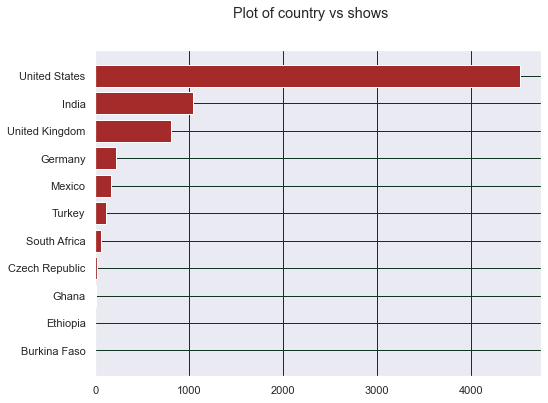

In [109]:
max_show_country=country[0:11]
max_show_country = pd.DataFrame(max_show_country) 
max_show_country= max_show_country.sort_values(1)

plot, ax = plt.subplots(1, figsize=(8, 6))
plot.suptitle('Plot of country vs shows')
ax.barh(max_show_country[0],max_show_country[1],color='brown')
plt.grid(b=True, which='major', color='#123423', linestyle='-')

plt.show()

<h3>Based upon the duration of Movies</h3>

In [110]:
def generate_duration_df(df):
    new_df = df.groupby(['duration']).agg({'show_id': 'count'}).reset_index()
    new_df = new_df[new_df['show_id'] != 0]
    new_df.columns = ['duration', 'counts']
    new_df = new_df.sort_values('duration')
    return new_df

In [111]:
new_movie_df = generate_duration_df(movie_df)
plot = px.bar(x=new_movie_df['duration'], y = new_movie_df['counts'])
plot.update_traces(marker = dict(color= 'green'))

plot.update_xaxes(type='category',categoryorder='total descending')

plot.show()

<h3>Based upon the seasons of TV series</h3>

In [112]:
new_tv_df = generate_duration_df(tv_df)
plot = px.bar(x=new_tv_df['duration'], y = new_tv_df['counts'])
plot.update_traces(marker = dict(color= '#E55451'))
plot.update_xaxes(type='category',categoryorder='total descending')
plot.show()


<h3>Grouped the shows and movies on basis of Genre</h3>

[('Documentaries', 869), ('International TV Shows', 1351), ('TV Dramas', 763), ('TV Mysteries', 98), ('Crime TV Shows', 470), ('TV Action & Adventure', 168), ('Docuseries', 395), ('Reality TV', 255), ('Romantic TV Shows', 370), ('TV Comedies', 581), ('TV Horror', 75), ('Children & Family Movies', 641), ('Dramas', 2427), ('Independent Movies', 756), ('International Movies', 2752), ('British TV Shows', 253), ('Comedies', 1674), ('Spanish-Language TV Shows', 174), ('Thrillers', 577), ('Romantic Movies', 616), ('Music & Musicals', 375), ('Horror Movies', 357), ('Sci-Fi & Fantasy', 243), ('TV Thrillers', 57), ("Kids' TV", 451), ('Action & Adventure', 859), ('TV Sci-Fi & Fantasy', 84), ('Classic Movies', 116), ('Anime Features', 71), ('Sports Movies', 219), ('Anime Series', 176), ('Korean TV Shows', 151), ('Science & Nature TV', 92), ('Teen TV Shows', 69), ('Cult Movies', 71), ('TV Shows', 16), ('Faith & Spirituality', 65), ('LGBTQ Movies', 102), ('Stand-Up Comedy', 343), ('Movies', 57), ('S

<BarContainer object of 11 artists>

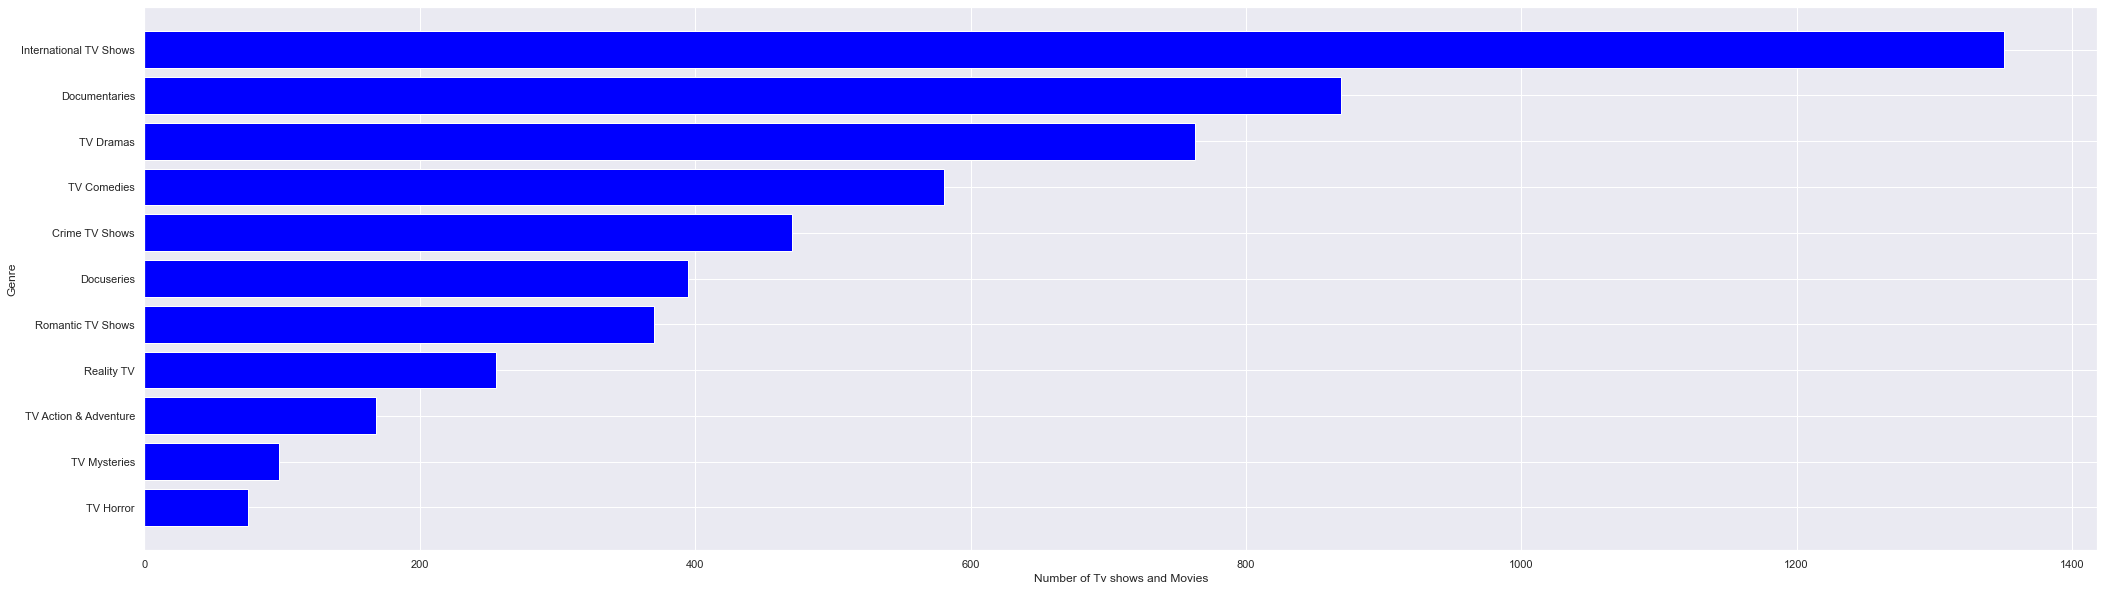

In [113]:
grouped_genre=df["listed_in"]
grouped_genre=", ".join(grouped_genre)
grouped_genre=grouped_genre.replace(',, ',', ')
grouped_genre=grouped_genre.split(", ")
grouped_genre= list(Counter(grouped_genre).items())
print(grouped_genre)

max=grouped_genre[0:11]
max = pd.DataFrame(max) 
max= max.sort_values(1)

plt.figure(figsize=(35,10))
plt.xlabel('Number of Tv shows and Movies')
plt.ylabel('Genre')
plt.barh(max[0],max[1], color='blue')

<h3>Heat map of the number of Tv Shows added between the year and the month</h3> 

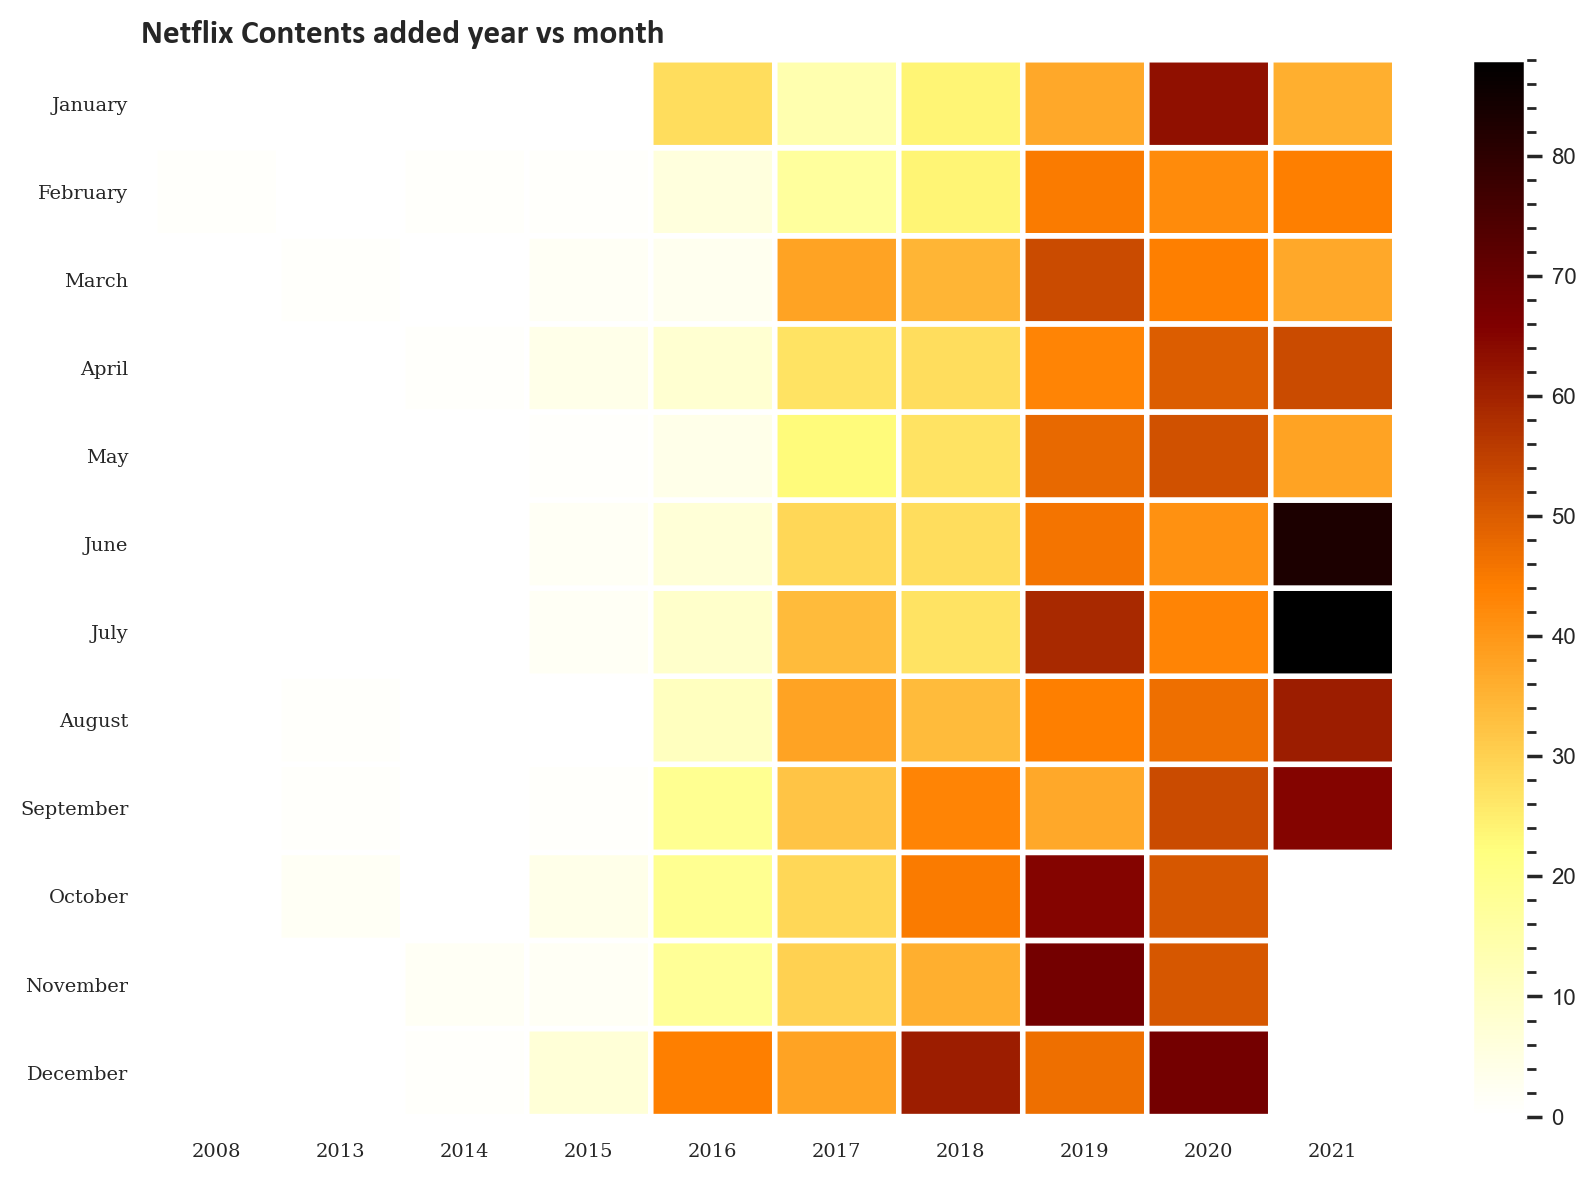

In [114]:
date_df = tv_df[['date_added']].dropna()
date_df['year'] = date_df['date_added'].apply(lambda x : x.split(', ')[-1])
date_df['month'] = date_df['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = date_df.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents added year vs month', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()